# TP2 - AI : Heuristic Research and Constraint Satisfaction Problems
---
_Author: CHRISTOFOROU Anthony_\
_Due Date: XX-XX-2023_\
_Updated: 27-10-2023_\
_Description: TP3 - AI_

---

In [231]:
# Libraries
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output

# Modules
from assignment3.games.tic_tac_toe.game import TicTacToeGame
from assignment3.games.othello.game import OthelloGame
from assignment3.games.othello.game_modified import OthelloGameModified
from assignment3.algorithms.minimax import Minimax

# make figures appear inline
matplotlib.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Tic-Tac-Toe, MiniMax and Alpha-Beta Pruning

Let's try to implement the MiniMax algorithm with Alpha-Beta Pruning to play Tic-Tac-Toe.

### 1.1. Tic-Tac-Toe

We first implement a Tic-Tac-Toe game that can be played by two players using predefined strategies.

In [232]:
def display_result(result: int) -> None:
    """Displays the result of a game of Tic-Tac-Toe.
    
    Args:
        result (int): The result of the game. 1 for player X wins, -1 for player O wins and 0 for a draw.
    """
    match result:
        case 1:
            print("Player X wins!")
        case -1:
            print("Player O wins!")
        case 0:
            print("It's a draw!")

# Let's simulate a game of Tic-Tac-Toe
game = TicTacToeGame()

# These are the moves in the format (x, y) where x is the row and y is the column
moves = [(0, 0), (1, 1), (0, 1), (1, 2), (0, 2)]

for x, y in moves:
    print(f"Player {game.current_player}'s turn")
    game_over, result = game.step(x, y)
    game.render()
    if game_over:
        display_result(result)
        break

Player x's turn
   0   1   2
 +---+---+---+
0| x |   |   |
 +---+---+---+
1|   |   |   |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player o's turn
   0   1   2
 +---+---+---+
0| x |   |   |
 +---+---+---+
1|   | o |   |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player x's turn
   0   1   2
 +---+---+---+
0| x | x |   |
 +---+---+---+
1|   | o |   |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player o's turn
   0   1   2
 +---+---+---+
0| x | x |   |
 +---+---+---+
1|   | o | o |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player x's turn
   0   1   2
 +---+---+---+
0| x | x | x |
 +---+---+---+
1|   | o | o |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player X wins!


### 1.2 MiniMax and Alpha-Beta Pruning

We then implement the MiniMax algorithm with Alpha-Beta Pruning to play Tic-Tac-Toe.

Let's try a simple example:

In [233]:
# game of Tic-Tac-Toe
game = TicTacToeGame()

# the minimax agent
minimax = Minimax(game)
depth = 4 # the depth of the search tree

# play the game
while True:
    print(f"Player {game.current_player}'s turn")
    best_score, best_move = minimax.search(depth, float('-inf'), float('inf'), game.current_player == 'x')
    game_over, result = game.step(*best_move)
    game.render()
    if game_over:
        display_result(result)
        break

Player x's turn
   0   1   2
 +---+---+---+
0| x |   |   |
 +---+---+---+
1|   |   |   |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player o's turn
   0   1   2
 +---+---+---+
0| x |   |   |
 +---+---+---+
1|   | o |   |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player x's turn
   0   1   2
 +---+---+---+
0| x | x |   |
 +---+---+---+
1|   | o |   |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player o's turn
   0   1   2
 +---+---+---+
0| x | x | o |
 +---+---+---+
1|   | o |   |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player x's turn
   0   1   2
 +---+---+---+
0| x | x | o |
 +---+---+---+
1| x | o |   |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player o's turn
   0   1   2
 +---+---+---+
0| x | x | o |
 +---+---+---+
1| x | o | o |
 +---+---+---+
2|   |   |   |
 +---+---+---+
Player x's turn
   0   1   2
 +---+---+---+
0| x | x | o |
 +---+---+---+
1| x | o | o |
 +---+---+---+
2| x |   |   |
 +---+---+---+
Player X wins!


As we can see that the minimax agent is pretty stupid. It is unable to see that it is about to lose and it is unable to see that it can win in one move. This might be because of the search tree or because of the evaluation function. 

## 2. Othello and custom evaluation function

### 2.1. Implementation of Othello

We first implement the Othello game that can be played by two players using predefined strategies.

In [234]:
def display_result_othello(result: int) -> None:
    """Displays the result of a game of Othello.
    
    Args:
        result (int): The result of the game. 1 for player ● wins, -1 for player O wins and 0 for a draw.
    """
    match result:
        case 1:
            print("Black wins!")
        case -1:
            print("White wins!")
        case 0:
            print("It's a draw!")

game = OthelloGame()
game.render()

moves = [(3, 2), (2, 4), (3, 5)]

for x, y in moves:
    print(f"Player {game.current_player}'s turn")
    game_over, result = game.step(x, y)
    game.render()
    if game_over:
        display_result_othello(result)
        break

    0   1   2   3   4   5   6   7
  +---+---+---+---+---+---+---+---+
0 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
1 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
2 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
3 |   |   |   | ○ | ● |   |   |   |
  +---+---+---+---+---+---+---+---+
4 |   |   |   | ● | ○ |   |   |   |
  +---+---+---+---+---+---+---+---+
5 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
6 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
7 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
Player ●'s turn
    0   1   2   3   4   5   6   7
  +---+---+---+---+---+---+---+---+
0 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
1 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
2 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
3 |   |   | ● | ● | ● |   |   |   |
  +---+---+---+-

### 2.2 Custom Evaluation Function, Minimax and Alpha-Beta Pruning

#### 2.2.1. Custom Evaluation Function

We will implement 2 different evaluation functions. The first one will be a simple evaluation function that will only count the number of pieces of each player. 

```python
def evaluate(self):
    black_count = sum(row.count('○') for row in self.board.board)
    white_count = sum(row.count('●') for row in self.board.board)

    if self.current_player == '●':
        return black_count - white_count
    else:
        return white_count - black_count
```

The second one will takes into account the strategic value of each piece's position on the board. Corner and edge pieces are often more valuable.

```python
def evaluate(self):
    positional_weights = [
        [ 4, -3, 2, 2, 2, 2, -3,  4],
        [-3, -4, -1, -1, -1, -1, -4, -3],
        [ 2, -1,  1,  0,  0,  1, -1,  2],
        [ 2, -1,  0,  1,  1,  0, -1,  2],
        [ 2, -1,  0,  1,  1,  0, -1,  2],
        [ 2, -1,  1,  0,  0,  1, -1,  2],
        [-3, -4, -1, -1, -1, -1, -4, -3],
        [ 4, -3,  2,  2,  2,  2, -3,  4]
    ]
    
    player_score = opponent_score = 0
    opponent_symbol = '○' if self.current_player == '●' else '●'

    for x in range(8):
        for y in range(8):
            if self.board.board[x][y] == player_symbol:
                player_score += positional_weights[x][y]
            elif self.board.board[x][y] == opponent_symbol:
                opponent_score += positional_weights[x][y]

    return player_score - opponent_score
``````


#### 2.2.2. Minimax and Alpha-Beta Pruning

Let's try to have the minimax agent play some moves.

In [235]:
game = OthelloGame()
game.render()
minimax = Minimax(game)

depth = 4

for _ in range(10):
    print(f"Player {game.current_player}'s turn")
    best_score, best_move = minimax.search(depth, float('-inf'), float('inf'), game.current_player == '●')
    game_over, result = game.step(*best_move)
    game.render()
    if game_over:
        display_result_othello(result)
        break

    0   1   2   3   4   5   6   7
  +---+---+---+---+---+---+---+---+
0 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
1 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
2 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
3 |   |   |   | ○ | ● |   |   |   |
  +---+---+---+---+---+---+---+---+
4 |   |   |   | ● | ○ |   |   |   |
  +---+---+---+---+---+---+---+---+
5 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
6 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
7 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
Player ●'s turn
    0   1   2   3   4   5   6   7
  +---+---+---+---+---+---+---+---+
0 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
1 |   |   |   |   |   |   |   |   |
  +---+---+---+---+---+---+---+---+
2 |   |   |   | ● |   |   |   |   |
  +---+---+---+---+---+---+---+---+
3 |   |   |   | ● | ● |   |   |   |
  +---+---+---+-

## 3. Othello Showdown

Let's have two agents play against each other and see which one is the best.
For this we will extract 3 different data from the games:
- Success rate: the number of games won by the agent
- Number of moves: the average number of moves per game
- A Graph of the evolution of the success rate over the depth of the search tree

We are going to have 2 different agents:
- Simple Agent: uses the simple evaluation function
- Complex Agent: uses the complex evaluation function

For each agent we will have 8 different depths.

In [236]:
results = dict()

game = OthelloGame()
minimax = Minimax(game)

for depth in range(1, 9):
        game.reset()
        nb_moves = 0
        while True:
            clear_output(wait=True)
            game.render()
            best_score, best_move = minimax.search(depth, float('-inf'), float('inf'), game.current_player == '●')
            nb_moves += 1 if game.current_player == '●' else 0
            game_over, result = game.step(*best_move)
            if game_over:
                results[(depth, str(game.evaluate.__self__.__class__.__name__))] = [(result, nb_moves)]
                break

    0   1   2   3   4   5   6   7
  +---+---+---+---+---+---+---+---+
0 | ○ | ○ | ○ | ○ | ● | ● | ● | ● |
  +---+---+---+---+---+---+---+---+
1 | ○ | ○ | ○ | ● | ● | ● | ● | ○ |
  +---+---+---+---+---+---+---+---+
2 | ○ | ○ | ● | ○ | ● | ● | ○ | ○ |
  +---+---+---+---+---+---+---+---+
3 | ○ | ○ | ● | ● | ● | ● | ● | ● |
  +---+---+---+---+---+---+---+---+
4 | ○ | ○ | ● | ● | ● | ● | ● | ● |
  +---+---+---+---+---+---+---+---+
5 | ○ | ○ | ○ | ● | ● | ● | ● | ● |
  +---+---+---+---+---+---+---+---+
6 | ○ | ○ | ● | ● | ○ | ○ | ○ | ○ |
  +---+---+---+---+---+---+---+---+
7 | ○ | ● | ● | ● | ● | ● |   | ○ |
  +---+---+---+---+---+---+---+---+


Let's try with the complex agent now:

In [237]:
game = OthelloGameModified()
minimax = Minimax(game)

for depth in range(1, 9):
        game.reset()
        nb_moves = 0
        while True:
            clear_output(wait=True)
            game.render()
            best_score, best_move = minimax.search(depth, float('-inf'), float('inf'), game.current_player == '●')
            nb_moves += 1 if game.current_player == '●' else 0
            game_over, result = game.step(*best_move)
            if game_over:
                results[(depth, str(game.evaluate.__self__.__class__.__name__))] = [(result, nb_moves)]
                break

    0   1   2   3   4   5   6   7
  +---+---+---+---+---+---+---+---+
0 | ● | ● | ● | ● | ● | ● | ○ | ● |
  +---+---+---+---+---+---+---+---+
1 | ○ | ○ | ○ | ● | ● | ○ | ○ | ● |
  +---+---+---+---+---+---+---+---+
2 | ● | ○ | ● | ○ | ○ | ● | ○ | ● |
  +---+---+---+---+---+---+---+---+
3 | ● | ● | ○ | ○ | ○ | ○ | ○ | ○ |
  +---+---+---+---+---+---+---+---+
4 | ● | ○ | ● | ○ | ● | ○ | ○ | ○ |
  +---+---+---+---+---+---+---+---+
5 | ● | ● | ● | ● | ● | ○ | ○ | ○ |
  +---+---+---+---+---+---+---+---+
6 | ● | ○ |   | ● | ● | ● | ● | ○ |
  +---+---+---+---+---+---+---+---+
7 | ● | ○ | ● | ● | ● | ● | ● | ● |
  +---+---+---+---+---+---+---+---+


In [238]:
# print the results data structure
for key, value in results.items():
    print(f"Depth: {key[0]}, Evaluation function: {key[1]} | Result: {value[0][0]}, Number of moves: {value[0][1]}")
    
# OthelloGame win %
othello_game_win = [value[0][0] for key, value in results.items() if key[1] == 'OthelloGame']
othello_game_win = [1 if x == 1 else 0 for x in othello_game_win]
othello_game_win = sum(othello_game_win) / len(othello_game_win)

# OthelloGameModified win %
othello_game_modified_win = [value[0][0] for key, value in results.items() if key[1] == 'OthelloGameModified']
othello_game_modified_win = [1 if x == 1 else 0 for x in othello_game_modified_win]
othello_game_modified_win = sum(othello_game_modified_win) / len(othello_game_modified_win)

print(f"OthelloGame win %: {othello_game_win * 100}")
print(f"OthelloGameModified win %: {othello_game_modified_win * 100}")

Depth: 1, Evaluation function: OthelloGame | Result: -1, Number of moves: 24
Depth: 2, Evaluation function: OthelloGame | Result: -1, Number of moves: 27
Depth: 3, Evaluation function: OthelloGame | Result: -1, Number of moves: 30
Depth: 4, Evaluation function: OthelloGame | Result: 1, Number of moves: 30
Depth: 5, Evaluation function: OthelloGame | Result: -1, Number of moves: 30
Depth: 6, Evaluation function: OthelloGame | Result: 1, Number of moves: 30
Depth: 7, Evaluation function: OthelloGame | Result: -1, Number of moves: 30
Depth: 8, Evaluation function: OthelloGame | Result: -1, Number of moves: 30
Depth: 1, Evaluation function: OthelloGameModified | Result: 1, Number of moves: 31
Depth: 2, Evaluation function: OthelloGameModified | Result: -1, Number of moves: 30
Depth: 3, Evaluation function: OthelloGameModified | Result: 1, Number of moves: 30
Depth: 4, Evaluation function: OthelloGameModified | Result: 1, Number of moves: 31
Depth: 5, Evaluation function: OthelloGameModifie

### Graphs

Let's plot the graphs and see what we can learn from them.

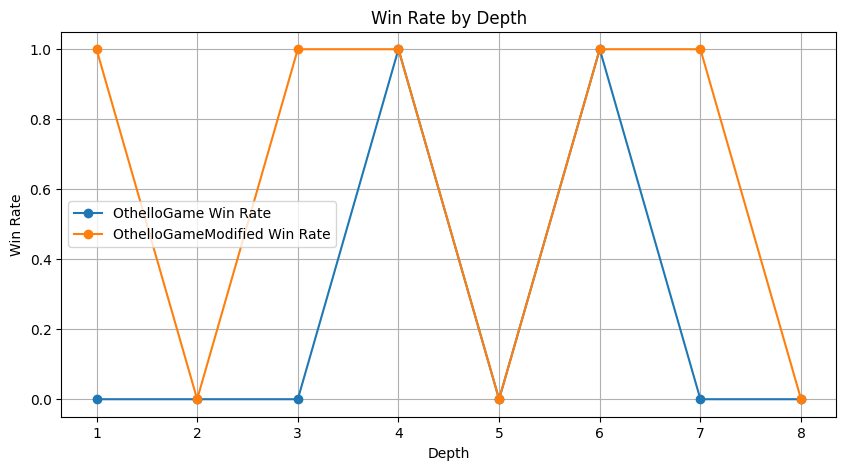

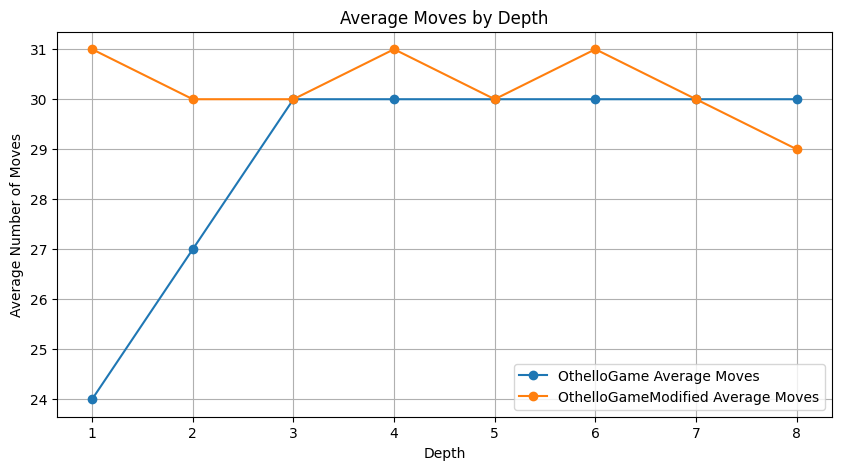

In [239]:
win_rates = {key: sum(1 for result in value if result[0] == 1) / len(value) for key, value in results.items()}
average_moves = {key: sum(result[1] for result in value) / len(value) for key, value in results.items()}

# Separating data for plotting
depths = range(1, 9)
win_rates_othello = [win_rates[(depth, 'OthelloGame')] for depth in depths]
win_rates_othello_modified = [win_rates[(depth, 'OthelloGameModified')] for depth in depths]
avg_moves_othello = [average_moves[(depth, 'OthelloGame')] for depth in depths]
avg_moves_othello_modified = [average_moves[(depth, 'OthelloGameModified')] for depth in depths]

# Plotting win rates
plt.figure(figsize=(10, 5))
plt.plot(depths, win_rates_othello, label='OthelloGame Win Rate', marker='o')
plt.plot(depths, win_rates_othello_modified, label='OthelloGameModified Win Rate', marker='o')
plt.xlabel('Depth')
plt.ylabel('Win Rate')
plt.title('Win Rate by Depth')
plt.legend()
plt.grid(True)
plt.show()

# Plotting average moves
plt.figure(figsize=(10, 5))
plt.plot(depths, avg_moves_othello, label='OthelloGame Average Moves', marker='o')
plt.plot(depths, avg_moves_othello_modified, label='OthelloGameModified Average Moves', marker='o')
plt.xlabel('Depth')
plt.ylabel('Average Number of Moves')
plt.title('Average Moves by Depth')
plt.legend()
plt.grid(True)
plt.show()

We can see that the success rate of the simple agent is pretty low. It wins only about 25% of the games and only when the depth is 4 and 6. The success rate of the complex agent is much higher. It wins about 62% of the games. The depth when the complex agent wins are 1, 3, 4, 6 and 7 (Draw at depth 5). 

This is because we use a better evaluation function. The simple agent only takes into account the number of pieces of each player. The complex agent takes into account the strategic value of each piece's position on the board. 

This shows the importance of the evaluation function. The better the evaluation function, the better the agent will play.